# Model Training – Faster R-CNN

This notebook documents the training of a Faster R-CNN object detection model using the TensorFlow Object Detection API. The model is trained using pre-processed TFRecord datasets generated in the previous notebook.

## Model Selection

**Architecture:** A Faster R-CNN architecture with a ResNet-101 backbone was selected from the TensorFlow 2 Object Detection Model Zoo. Faster R-CNN was chosen due to its strong localisation accuracy, which is good in detecting visually similar animal species in wildlife.

## Rationale:

**Two-stage detection:** The Region Proposal Network (RPN) followed by a classification head provides high localisation precision, which is important for distinguishing species with similar body shapes and poses.
- **ResNet-101 backbone:** A deeper backbone enables richer feature extraction, improving discrimination between visually similar species while remaining feasible on available GPU hardware.
- **Feature Pyramid Network (FPN):** Multi-scale feature extraction allows effective detection of animals appearing at varying scales within images, consistent with observations from the exploratory data analysis.
- **COCO pretraining:** Initialising from a COCO-pretrained Faster R-CNN model enables effective transfer learning, reducing training time and improving generalisation on a limited wildlife dataset.
- **Accuracy-focused design:** Faster R-CNN prioritises detection accuracy over inference speed, which is appropriate for offline wildlife analysis rather than real-time applications.

## Training Configuration

The pretrained Faster R-CNN ResNet-101 pipeline was fine-tuned using the following configuration:

- **Number of classes:** 3 (OryxGazella, PantheraLeo, PhacochoerusAfricanus)
- **Input resolution:** 1024 × 1024 pixels
- **Batch size:** 1 
- **Training steps:** 20,000

### Learning Rate Schedule
- **Type:** Cosine decay with warm-up
- **Base learning rate:** 0.0004
- **warm-up** LR: 0.00004
- **Warm-up steps:** 500
- **Total decay steps:** 20,000
- **Justification:** This schedule enables stable optimisation during early training while gradually reducing the learning rate to encourage convergence.

### Data Augmentation (pipeline.config)
- Random horizontal flip
- Random hue adjustment
- Random contrast adjustment
- Random saturation adjustment
- Random square crop by scale (0.6–1.3)
These Augmentations were applied during training via the pipeline configuration. This augmentation strategy reflects common camera trap variation (viewpoint and lighting) while preserving biological realism and annotation integrity.

### Transfer Learning
- **Checkpoint:** COCO-pretrained Faster R-CNN ResNet-101  
- **Approach:** Full fine-tuning of all network layers

Given the size of the training dataset, full fine-tuning allows the model to adapt both low-level and high-level features to wildlife-specific visual patterns while benefiting from pretrained representations.

In [13]:
from IPython.display import HTML
HTML("""
<style>
/* Wrap long code and outputs */
pre, code { 
  white-space: pre-wrap !important;
  word-wrap: break-word !important;
}

/* Extra: make code smaller only when printing */
@media print {
  pre, code { font-size: 9pt !important; }
}
</style>
""")

## Training Execution

Training is performed using the TensorFlow Object Detection API training script, executed from within Jupyter Notebook to ensure reproducibility and consistency with the configured pipeline.

In [3]:
%cd C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\models\research

C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\models\research


### Verify training script availability

In [5]:
import os
print(os.getcwd())
print(os.path.exists("object_detection/model_main_tf2.py"))

C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\models\research
True


### Training Initialization

In [ ]:
!python -m object_detection.model_main_tf2 --pipeline_config_path="C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\Base\v1\object_detection\training\TF2\training\faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8\pipeline.config" --model_dir="C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\Base\v1\object_detection\training\TF2\faster_rcnn_output" --alsologtostderr

### Final Training Output (Step 20,000)

The screenshot below shows the final stage of training, confirming that the model completed all 20,000 steps. The total loss has stabilised and the learning rate has decayed to zero, which shows convergence.

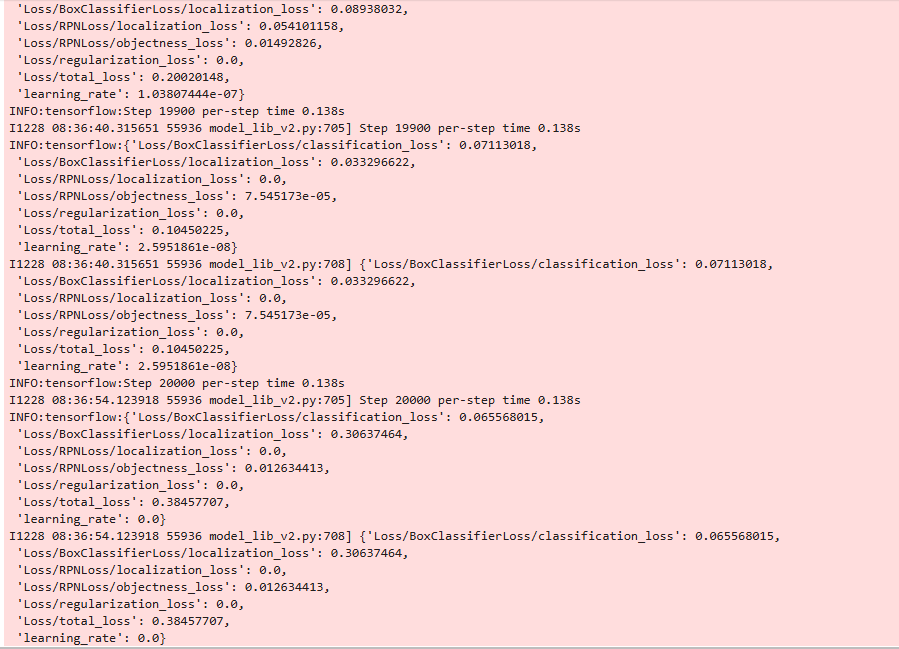

At the final training step, the total loss is approximately 0.38, with no further downward trend noticed. This confirms that the selected number of training steps was sufficient and that additional training would yield meaningful improvements.

Training was completed successfully at 20,000 steps, producing model checkpoints and TensorFlow event files. These outputs are used in subsequent notebooks for TensorBoard visualisation, model evaluation, and inference.

## Checkpoint Verification

Model checkpoints were saved throughout training to enable evaluation and inference.

In [10]:
import os, glob

model_dir = r"C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\Base\v1\object_detection\training\TF2\faster_rcnn_output"

print("Checkpoint file exists:", os.path.exists(os.path.join(model_dir, "checkpoint")))
print("Final checkpoint exists:", os.path.exists(os.path.join(model_dir, "ckpt-20.index")))

# Listing all available checkpoints
ckpt_files = sorted(glob.glob(os.path.join(model_dir, "ckpt-*.index")))
print(f"\nAvailable checkpoints: {len(ckpt_files)}")
for f in ckpt_files:
    print(f"  {os.path.basename(f)}")

Checkpoint file exists: True
Final checkpoint exists: True

Available checkpoints: 7
  ckpt-15.index
  ckpt-16.index
  ckpt-17.index
  ckpt-18.index
  ckpt-19.index
  ckpt-20.index
  ckpt-21.index


All checkpoints saved successfully. Checkpoint at step 20 (20,000 steps) will be used for evaluation.

## Training Summary

The Faster R-CNN ResNet-101 model was trained for 20,000 steps using a cosine decay learning rate schedule with warm-up and multiple data augmentation techniques. Training was completed successfully, with the loss stabilising toward the end of training as the learning rate decayed to near zero. Detailed convergence behaviour and performance metrics are analysed in the TensorBoard and Evaluation notebooks.